In [25]:
# Import necessary libraries
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Step 1: Load the two images
# Replace 'image1_path.jpg' and 'image2_path.jpg' with the paths to your image files
image1 = io.imread('data/azul.webp')
image2 = io.imread('data/monalisa.jpg')


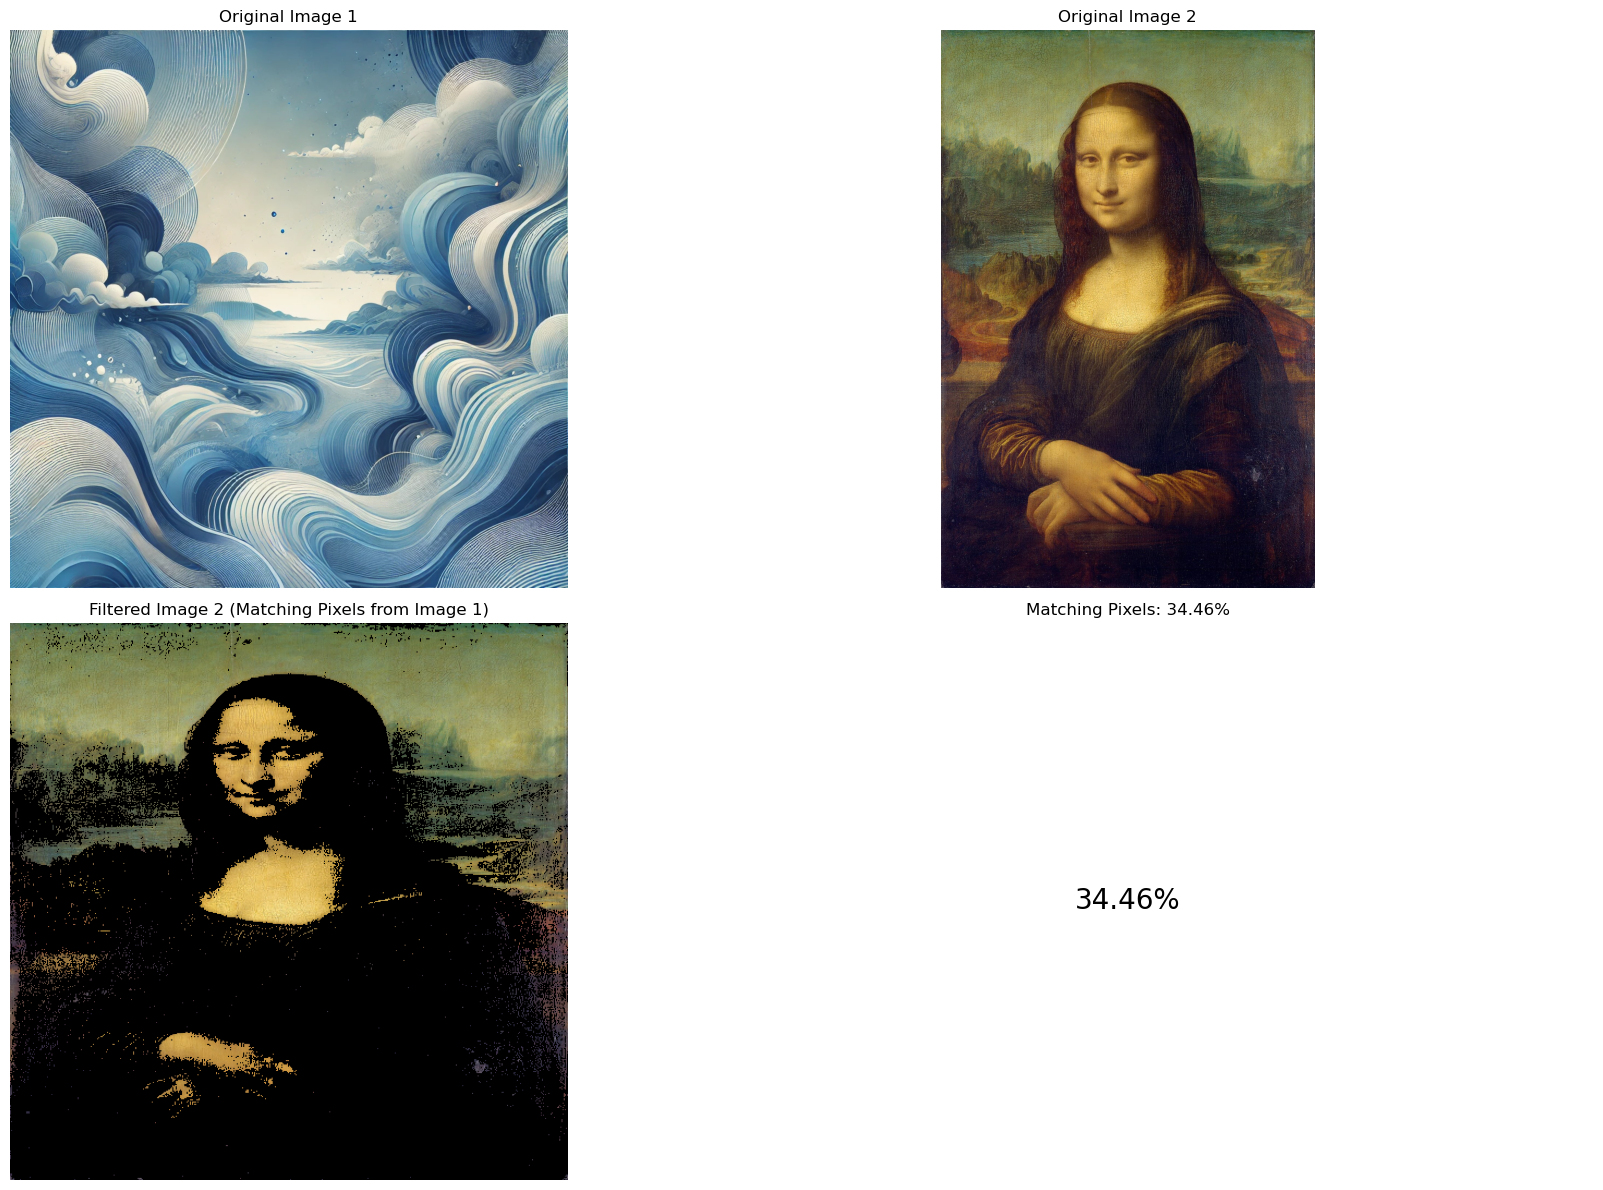

Percentage of matching pixels from Image 1 in Image 2: 34.46%


In [27]:
# Step 2: Standardize image dimensions
# Define the standard size for resizing (e.g., 256x256)
standard_size = (512, 512)

# Resize both images to the standard size
image1_resized = transform.resize(image1, standard_size, anti_aliasing=True, preserve_range=True).astype(np.uint8)
image2_resized = transform.resize(image2, standard_size, anti_aliasing=True, preserve_range=True).astype(np.uint8)

# Step 3: Flatten the RGB channels of both images
red1, green1, blue1 = image1_resized[:, :, 0].flatten(), image1_resized[:, :, 1].flatten(), image1_resized[:, :, 2].flatten()
red2, green2, blue2 = image2_resized[:, :, 0].flatten(), image2_resized[:, :, 1].flatten(), image2_resized[:, :, 2].flatten()

# Step 4: Sort the RGB values of Image 1
sorted_red1 = np.sort(red1)
sorted_green1 = np.sort(green1)
sorted_blue1 = np.sort(blue1)

# Step 5: Create a mask to find matching pixels in Image 2
mask = (
    np.isin(red2, sorted_red1) &
    np.isin(green2, sorted_green1) &
    np.isin(blue2, sorted_blue1)
)

# Step 6: Calculate the percentage of matching pixels
total_pixels_image1 = len(red1)  # Total pixels in Image 1 (resized version)
matching_pixels = mask.sum()  # Total matching pixels in Image 2
percentage_matching = (matching_pixels / total_pixels_image1) * 100

# Step 7: Create the filtered version of Image 2
# Start with a black image
output_image_resized = np.zeros_like(image2_resized)

# Replace black pixels with the corresponding pixels from Image 2 where the mask is True
output_image_resized.reshape(-1, 3)[mask] = image2_resized.reshape(-1, 3)[mask]

# Step 8: Display the results
plt.figure(figsize=(18, 12))

# Original Image 1
plt.subplot(2, 2, 1)
plt.title("Original Image 1")
plt.imshow(image1)
plt.axis('off')

# Original Image 2
plt.subplot(2, 2, 2)
plt.title("Original Image 2")
plt.imshow(image2)
plt.axis('off')

# Resized Image 2 (Filtered)
plt.subplot(2, 2, 3)
plt.title("Filtered Image 2 (Matching Pixels from Image 1)")
plt.imshow(output_image_resized.astype(np.uint8))
plt.axis('off')

# Display percentage of matching pixels
plt.subplot(2, 2, 4)
plt.title(f"Matching Pixels: {percentage_matching:.2f}%")
plt.text(0.5, 0.5, f"{percentage_matching:.2f}%", fontsize=20, ha='center', va='center')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 9: Print the percentage of matching pixels
print(f"Percentage of matching pixels from Image 1 in Image 2: {percentage_matching:.2f}%")
